In [74]:
source('./data_processing.R')

In [75]:
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

In [77]:
input_dir = './GiRAFR_outputs/inhouse/'
output_dir = './figures_results/inhouse/inhouse'

## All UMI profile

[1] "Number of mutant UMI"
[1] "Processed cell number: 5359"
[1] "Wildtype UMI: 148627"
[1] "Mutant UMI: 58797"


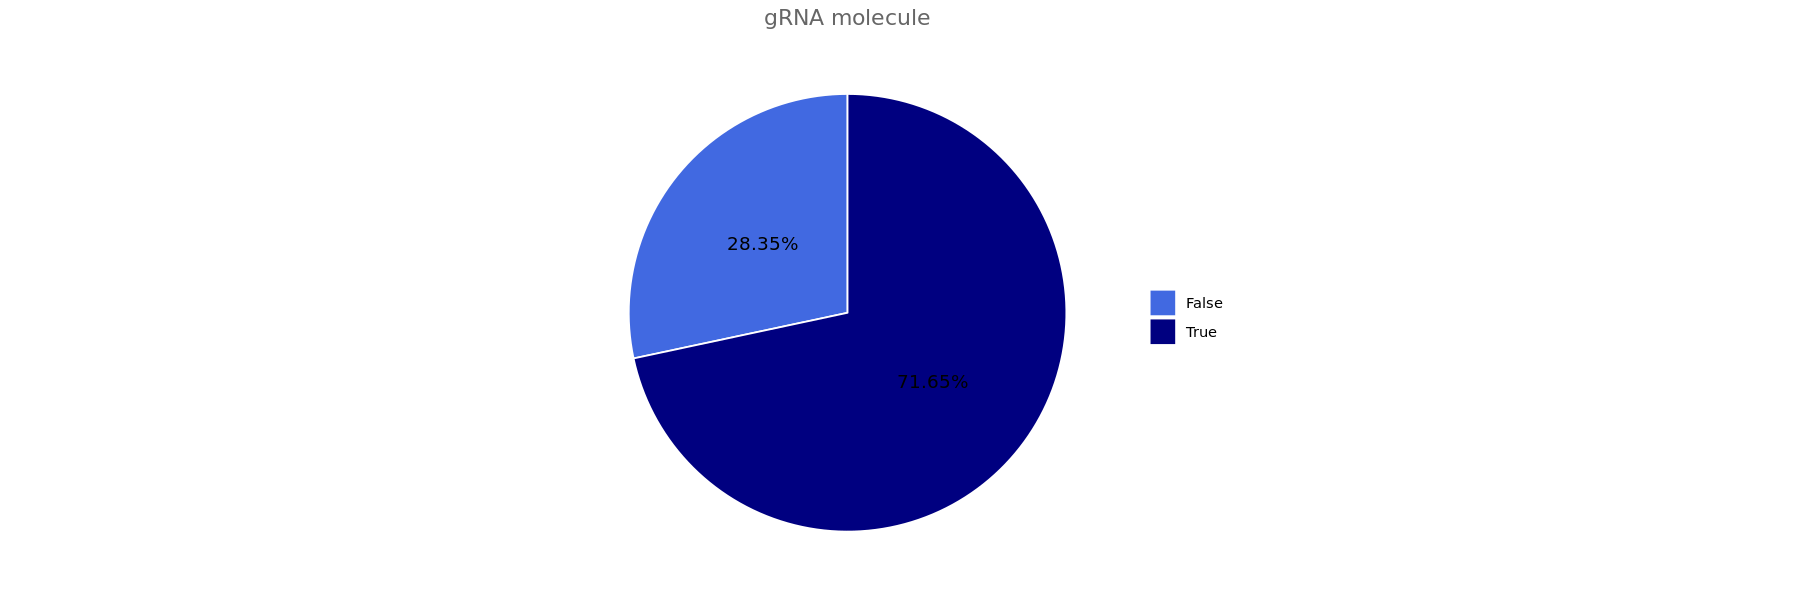

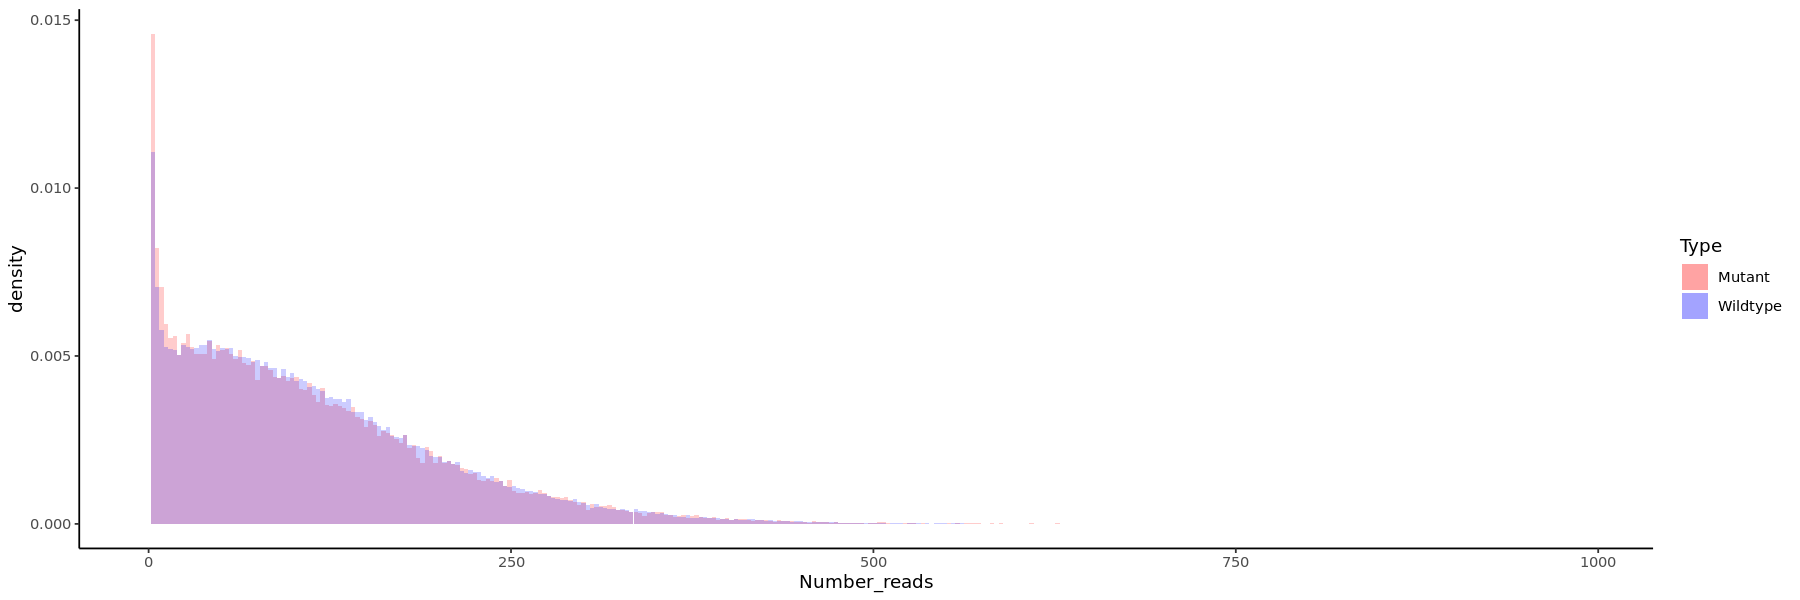

In [65]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


#### Source of mutation

In [66]:
consensus.count.matrix <- source_mutation(input_dir)

`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.


[1] "MT_lib_prep: 3319"
[1] "MT_virus: 55477"


### MT.txt

[1] "MT mutation table"

    A     C  D(1) D(10)  D(2)  D(3)  D(4)  D(5)  D(6)     G  I(1)     T 
   81    52   161     1    36     8     3     1     1    59    20    54 
[1] "MT mutation type"

  D   I   S 
211  20 246 
[1] "MT mutation structure"

gRNA Rest   U6 
 238  225   14 


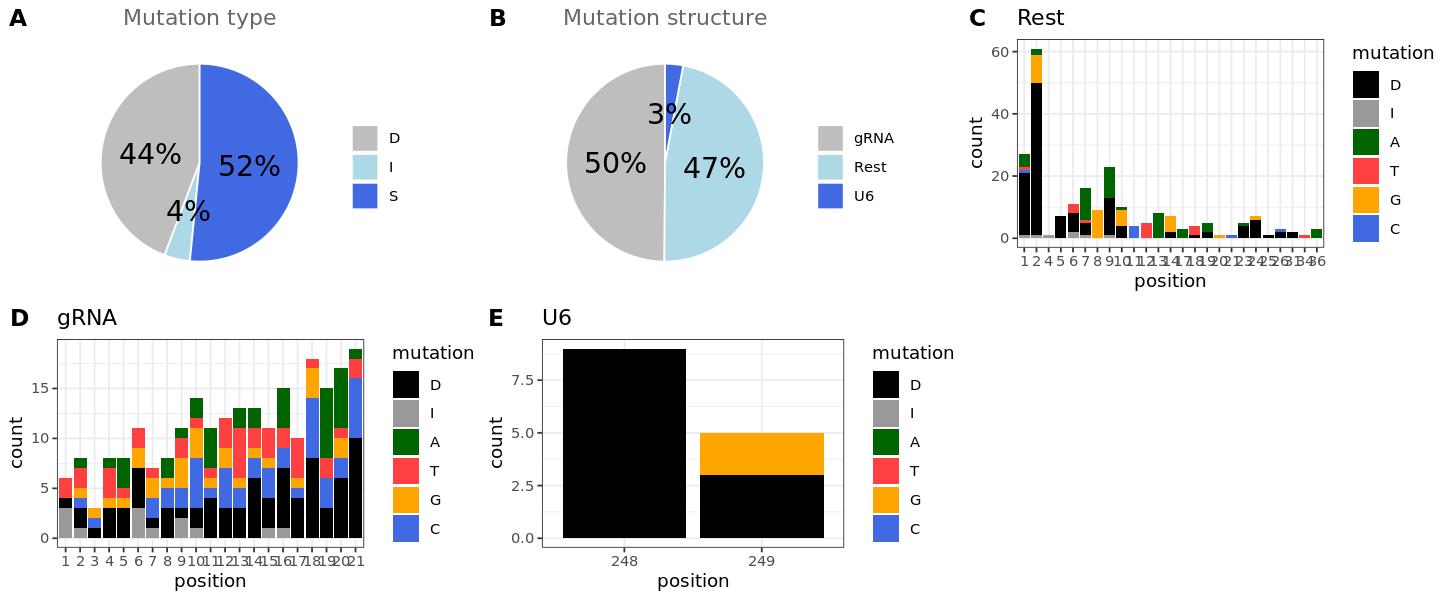

In [78]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

In [79]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.947   1.000  11.000 

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

Warning message:
“Removed 3 rows containing non-finite values (stat_count).”
Warning message:
“Removed 3 rows containing non-finite values (stat_count).”


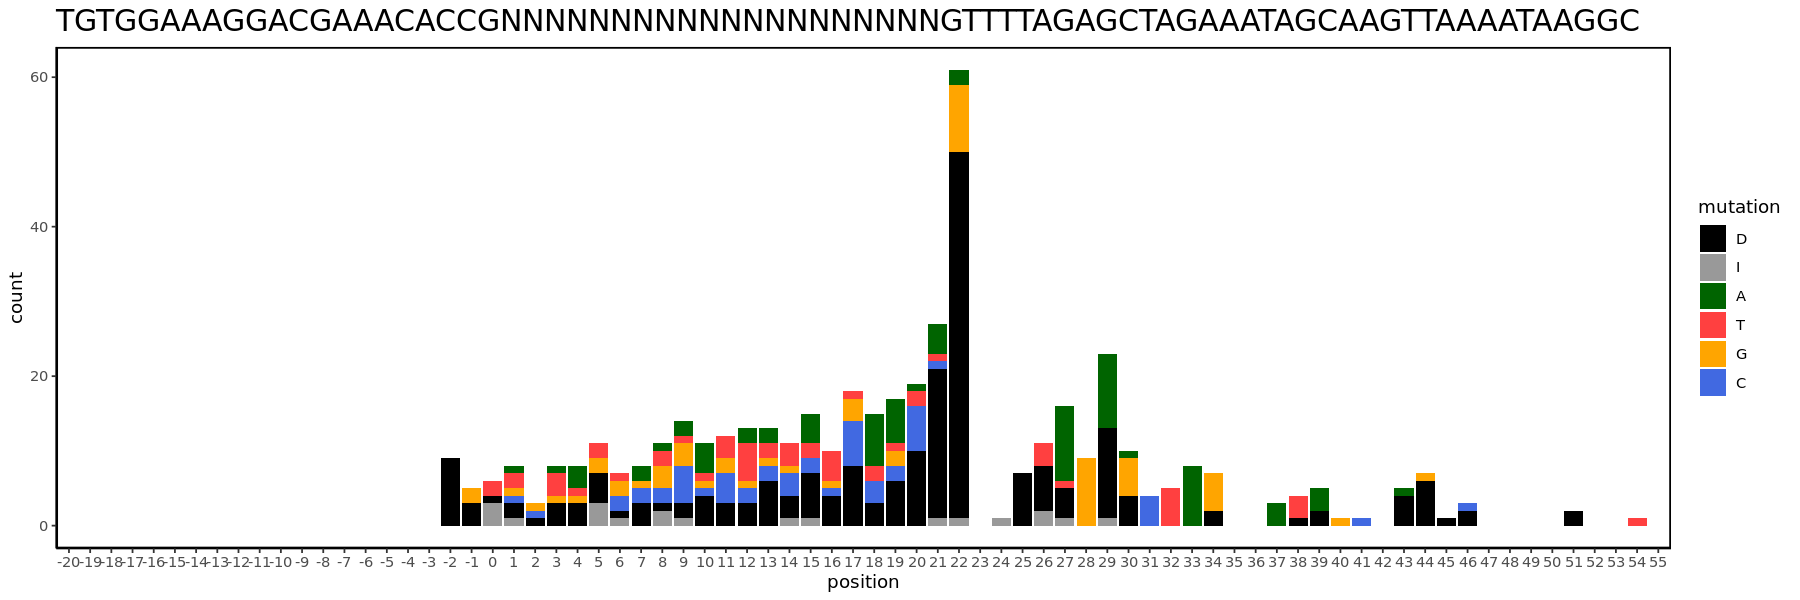

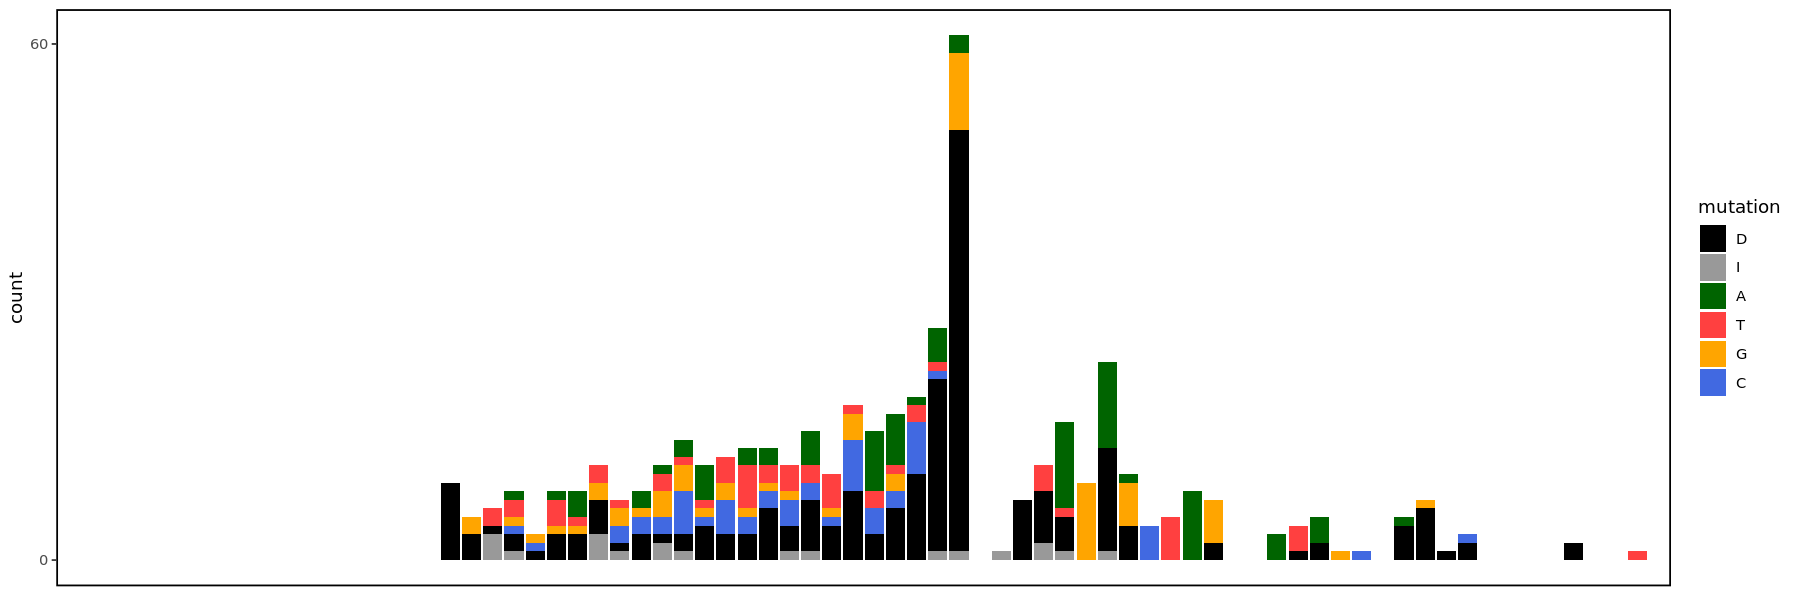

In [82]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)

MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TGTGGAAAGGACGAAACACCGNNNNNNNNNNNNNNNNNNNNGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGC')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,60))
#dev.off()

### Cell assignment

Rows: 5744 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


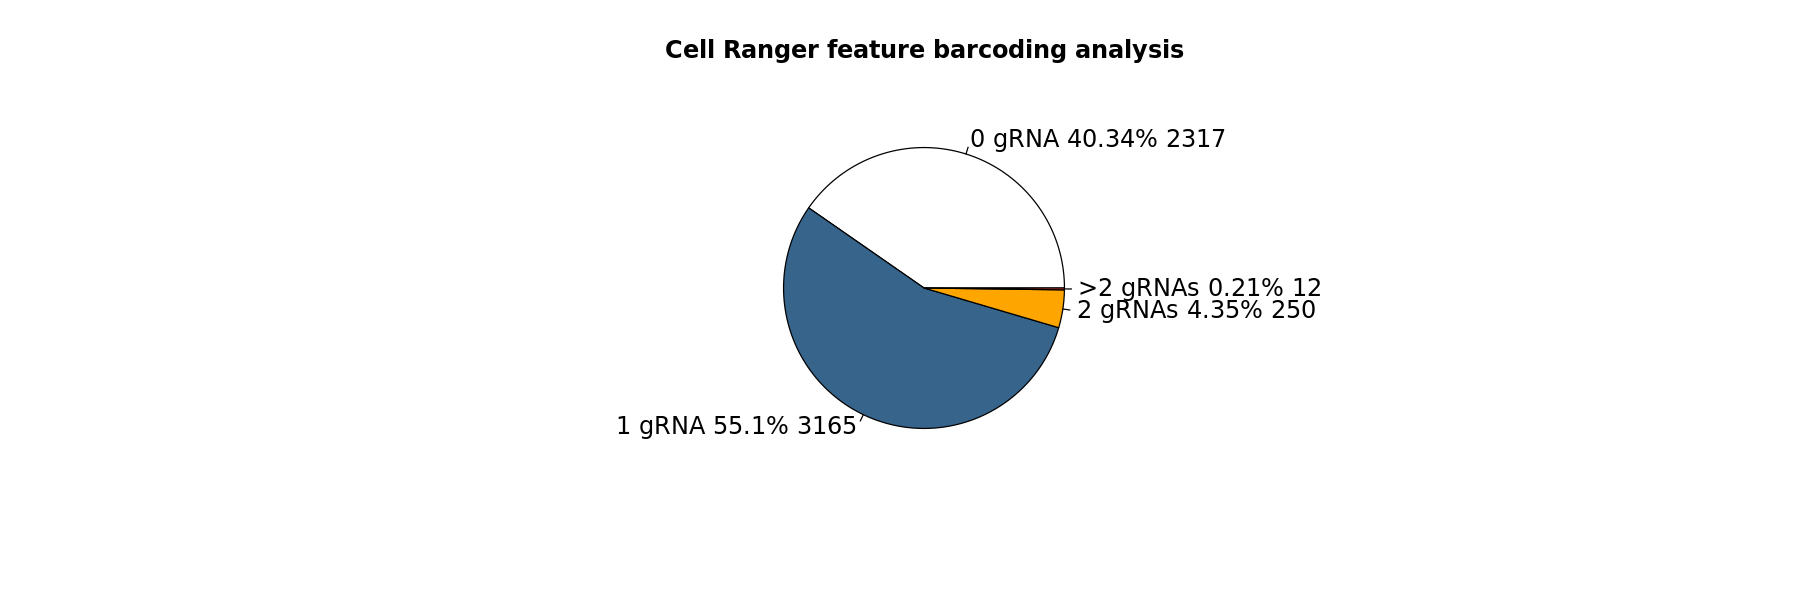

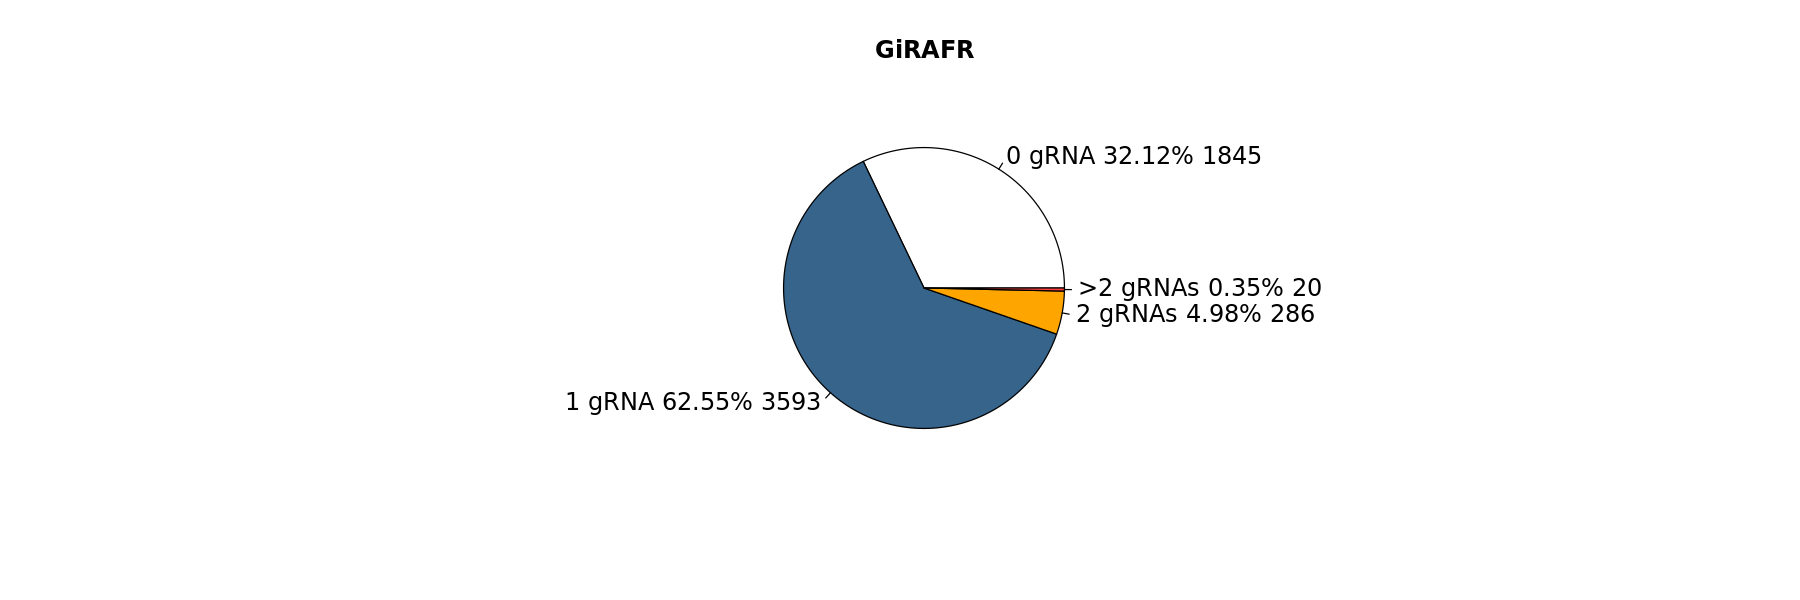

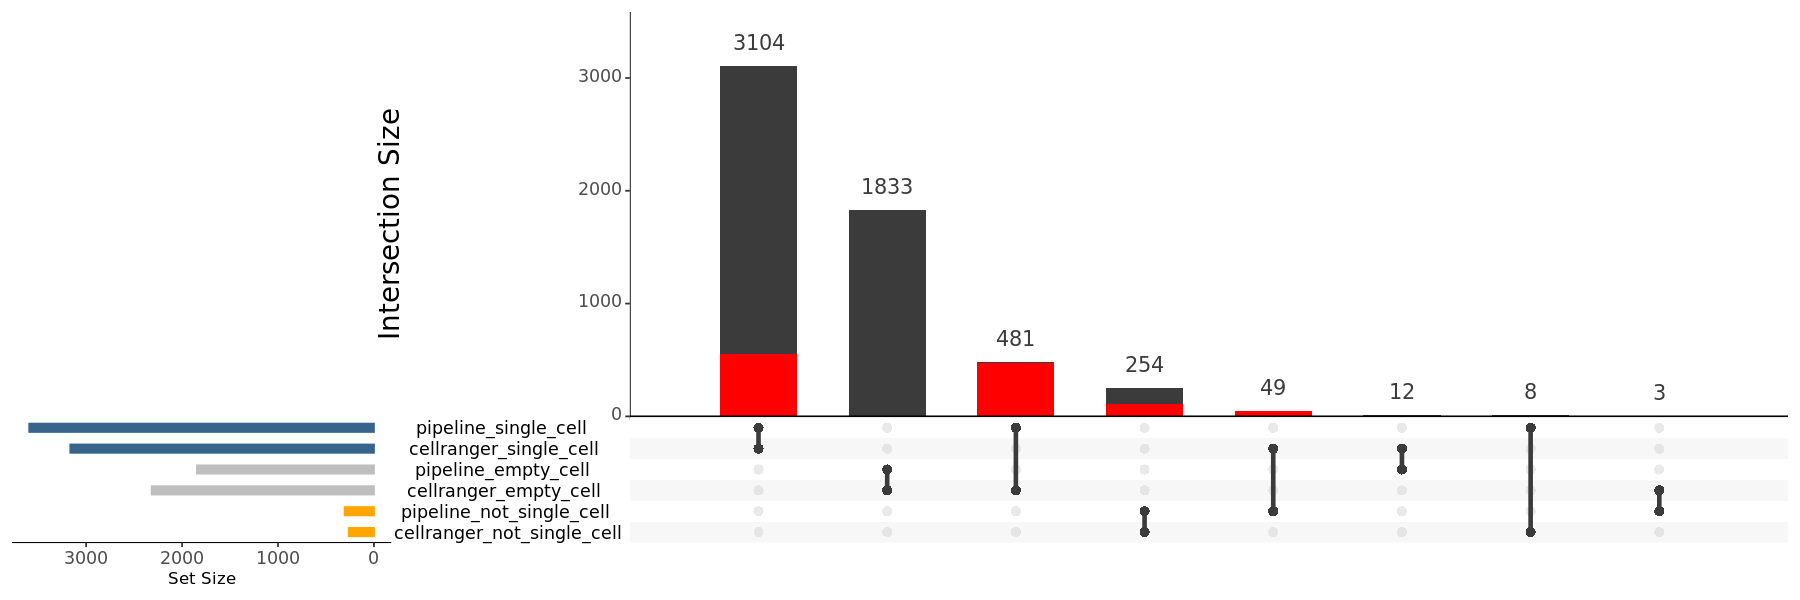

In [70]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/feature_barcoding_analysis/exp2_deep/exp2_deep_run_on_node/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/feature_barcoding_analysis/exp2_deep/exp2_deep_run_on_node/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"

compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)
